# Sample text data


I’m creating 4 sentences on which we’ll apply each of these techniques and understand how they work. For each of the techniques, I’ll use lowercase words only.

# CountVectorizer

 Identify unique words in the complete text data  For each sentence, we’ll create an array of zeros with the same length as the length of the unique words vector.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain

In [43]:
sentences = ['He is playing in the field',
             'He is running towards the football.',
             'The football game ended.',
             'It started raining while everyone was playing in the field.'
]

In [32]:
vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)

In [33]:
print(vectorizer.get_feature_names())

['ended', 'everyone', 'field', 'football', 'game', 'he', 'in', 'is', 'it', 'playing', 'raining', 'running', 'started', 'the', 'towards', 'was', 'while']


In [27]:
sentence_vectors.toarray()

array([[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]], dtype=int64)

In [19]:
len(sentence_vectors.toarray()[0])

17

# TF-IDF Vectorizer

While Count Vectorizer converts each sentence into its own vector, it does not consider the importance of a word across the complete list of sentences. For example, He is in two sentences and it provides no useful information in differentiating between the two. Thus, it should have a lower weight in the overall vector of the sentence. This is where the TF-IDF Vectorizer comes into the picture.

Consider the word 'he'

Total documents (N): 4

Documents in which the word appears (n): 2

Number of times the word appears in the first sentence: 1

Number of words in the first sentence: 6

Term Frequency(TF) = 1

Inverse Document Frequency(IDF) = log(N/n)

                                = log(4/2)
                                
                                = log(2)
TF-IDF value = 1 * log(2)

             = 0.69314718

sklearn calculates tfidf in a different way :  1 * (log(N/n) + 1)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
sentences

['He is playing in the field',
 'He is running towards the football.',
 'The football game ended.',
 'It started raining while everyone was playing in the field.']

In [36]:
vectorizer = TfidfVectorizer(norm = False, smooth_idf = False)
sentence_vectors = vectorizer.fit_transform(sentences)
print(sentence_vectors.toarray())

[[0.         0.         1.69314718 0.         0.         1.69314718
  1.69314718 1.69314718 0.         1.69314718 0.         0.
  0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.69314718 0.         1.69314718
  0.         1.69314718 0.         0.         0.         2.38629436
  0.         1.         2.38629436 0.         0.        ]
 [2.38629436 0.         0.         1.69314718 2.38629436 0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.        ]
 [0.         2.38629436 1.69314718 0.         0.         0.
  1.69314718 0.         2.38629436 1.69314718 2.38629436 0.
  2.38629436 1.         0.         2.38629436 2.38629436]]


# Word2Vec

These are a set of neural network models that have the aim to represent words in the vector space. These models are highly efficient and performant in understanding the context and relation between words

There are two models in this class:


---CBOW (Continuous Bag of Words): The neural network takes a look at the surrounding words (say 2 to the left and 2 to the right) and predicts the word that comes in between


---Skip-grams: The neural network takes in a word and then tries to predict the surrounding words

In [69]:
from gensim.models import word2vec

In [70]:
stringIn = "string.with.punctuation!"
punct = str.maketrans("","",string.punctuation)

In [71]:
sentences_low = list(map(lambda x: x.lower(), sentences))
sentences_tok = list(map(lambda x: x.split(), sentences_low))
rem_punct = list(map(lambda x: [elem.translate(punct) for elem in x], sentences_tok))

In [73]:
rem_punct

[['he', 'is', 'playing', 'in', 'the', 'field'],
 ['he', 'is', 'running', 'towards', 'the', 'football'],
 ['the', 'football', 'game', 'ended'],
 ['it',
  'started',
  'raining',
  'while',
  'everyone',
  'was',
  'playing',
  'in',
  'the',
  'field']]

In [91]:
model = word2vec.Word2Vec(rem_punct, workers = 1, size = 2, min_count = 1, window = 3, sg = 0)
similar_word = model.wv.most_similar('football')
print("Most common word to football is: {}".format(similar_word[0]))

Most common word to football is: ('raining', 0.9496791958808899)


In [92]:
similar_word

[('raining', 0.9496791958808899),
 ('was', 0.8082792162895203),
 ('playing', 0.7591714859008789),
 ('field', 0.6648499965667725),
 ('started', 0.6247442364692688),
 ('game', 0.6089167594909668),
 ('in', 0.5790954828262329),
 ('is', 0.5568622946739197),
 ('running', 0.5119740962982178),
 ('the', 0.22639277577400208)]

# Embeddings from Language Models (ELMo)

https://github.com/strongio/keras-elmo/blob/master/Elmo%20Keras.ipynb

ELMo is a novel way to represent words in vectors or embeddings

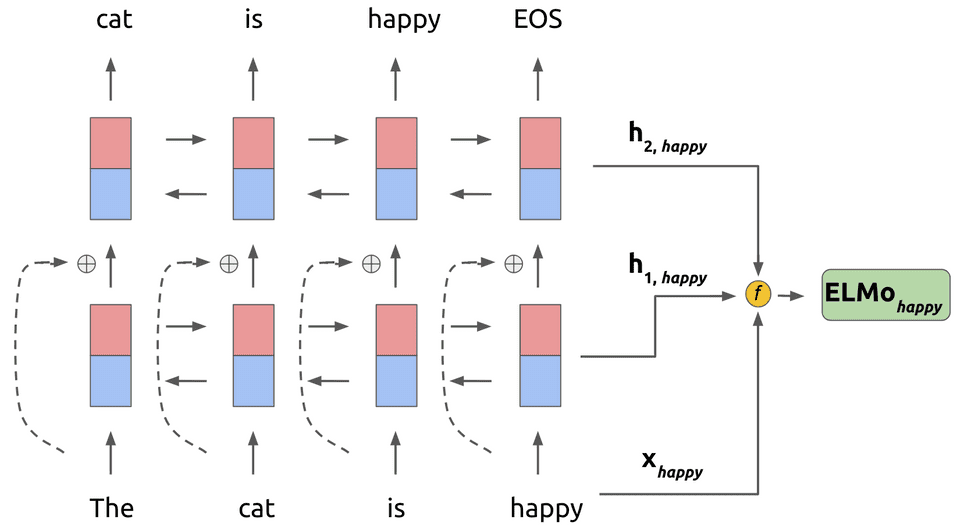

Where ELMo takes big strides is in how we use the language model once it is trained.

Assume that we are looking at the k word in our input. Using our trained 2-layer language model,

---we take the word representation x_{k} 

--- as well as the bidirectional hidden layer representations h1_k h2_k 

and combine them into a new weighted task representation. This look as follows:

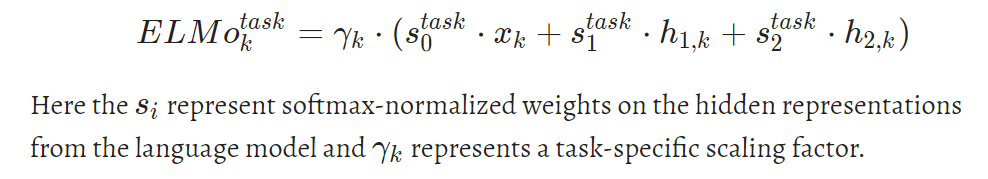

Now, in traditional neural language models, each token in the first input layer (in this case The cat is happy) is converted into a fixed-length word embedding before being passed into the recurrent unit. This is done either by initializing a word embedding matrix of size (Vocabulary size) x (Word embedding dimension), or by using a pretrained embedding such as GLoVe for each token.

However, for the ELMo language model, we do something a bit more complex. Rather than simply looking up an embedding in a word embedding matrix, we first convert each token to an appropriate representation using character embeddings. This character embedding representation is then run through a convolutional layer using some number of filters, followed by a max-pool layer. Finally this representation is passed through a 2-layer highway network before being provided as the input to the LSTM layer.

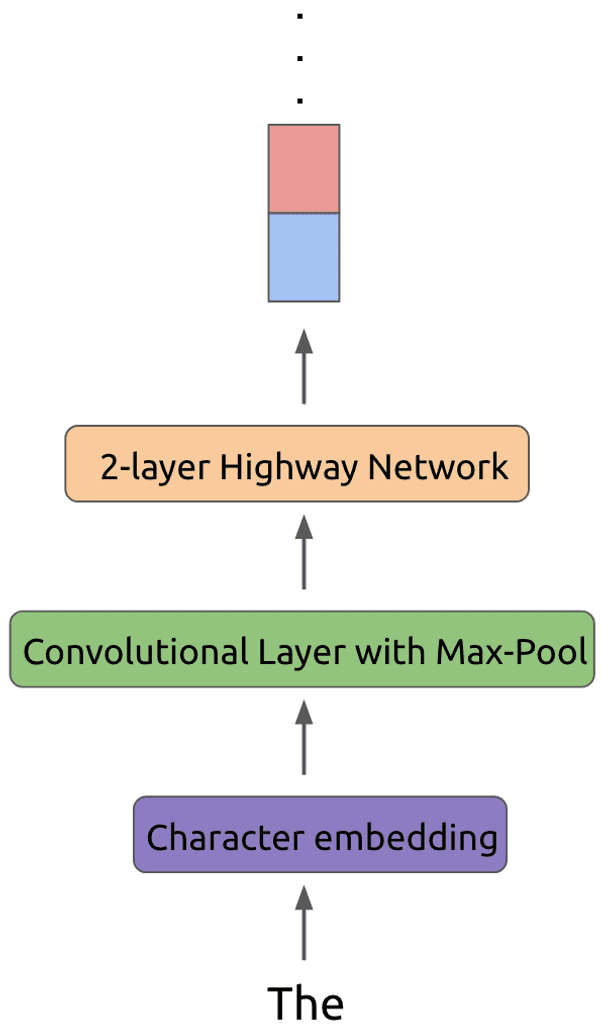

In [1]:
# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from keras.engine import Layer
import numpy as np
import string
from nltk.corpus import stopwords
from textblob import TextBlob as tb
from sklearn.model_selection import train_test_split
# Initialize session


Using TensorFlow backend.


In [2]:
sess = tf.Session()
K.set_session(sess)

In [3]:
train = pd.read_csv("./movie_review.csv")

# Pre Processing stuff

In [4]:
train.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [5]:
train = train[['text','tag']]

In [6]:
train.head()

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos


In [7]:
train['tag'] = train['tag'].apply(lambda x: 0 if x =='neg' else 1)

In [8]:
train.head()

,text,tag
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1


In [9]:
train.tag.value_counts(normalize=True)

1    0.508915
0    0.491085
Name: tag, dtype: float64

In [10]:
#removing punctuaction
punct = str.maketrans("","",string.punctuation)
train.text = train.text.apply(lambda x : x.translate(punct))

#convert text to lowercase 
train.text = train.text.str.lower()

#removing stopwords
stop = stopwords.words('english')
train.text = train.text.apply(lambda x : " ".join(word for word in x.split() if word not in stop))

#spell checking 
# train.text = train.text.apply(lambda x : "".join(tb(x).correct()))

In [20]:
train.to_csv("train.csv",index=False)

# End of preprocessing

In [11]:
# Create a custom layer that allows us to update weights (lambda layers do not have trainable parameters!)

class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024
        self.trainable=True
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=self.trainable,
                               name="{}_module".format(self.name))

        self.trainable_weights += K.tf.trainable_variables(scope="^{}_module/.*".format(self.name))
        super(ElmoEmbeddingLayer, self).build(input_shape)

    def call(self, x, mask=None):
        result = self.elmo(K.squeeze(K.cast(x, tf.string), axis=1),
                      as_dict=True,
                      signature='default',
                      )['default']
        return result

    def compute_mask(self, inputs, mask=None):
        return K.not_equal(inputs, '--PAD--')

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dimensions)

In [12]:
# Function to build model
def build_model():
    input_text = layers.Input(shape=(1,), dtype="string")
    embedding = ElmoEmbeddingLayer()(input_text)
    dense = layers.Dense(256, activation='relu')(embedding)
    pred = layers.Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[input_text], outputs=pred)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
  
    return model

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    train.text, train.tag, test_size=0.33, random_state=42)

In [14]:
X_train = X_train.tolist()
X_test  = X_test.tolist()

Y_train = Y_train.tolist()
Y_test  = Y_test.tolist()

X_train = np.array(X_train, dtype=object)[:, np.newaxis]
X_test  = np.array(X_test, dtype=object)[:, np.newaxis]

In [15]:
# Build and fit
model = build_model()
model.fit(X_train, 
          Y_train,
          #validation_data=(test_text, test_label),
          epochs=1,
          batch_size=32)

W1024 15:11:31.509633 19708 deprecation_wrapper.py:119] From c:\users\camng3\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1024 15:11:31.511596 19708 deprecation_wrapper.py:119] From c:\users\camng3\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:519: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1024 15:11:32.392625 19708 deprecation_wrapper.py:119] From c:\users\camng3\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4140: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1024 15:11:32.412622 19708 deprecation_wrapper.py:119] From c:\users\camng3\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
elmo_embedding_layer_1 (Elmo (None, 1024)              4         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 262,661
Trainable params: 262,661
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
31808/43362 [=====================>........] - ETA: 3:42 - loss: 0.6676 - acc: 0.5926

KeyboardInterrupt: 

In [ ]:
pre_save_preds = model.predict(X_test)